## Metin Temsili Yöntemleri
1. **Bag of Words (BoW)**
2. **TF-IDF (Term Frequency-Inverse Document Frequency)**
3. **N-Gram Modelleri**
4. **Word Embeddings**
5. **Transformers Tabanlı Metin Temsili**

### Bag of Words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
documents = [
    "kedi bahçede", "kedi evde"
]

vectorizer = CountVectorizer()

In [3]:
X = vectorizer.fit_transform(documents)

In [4]:
# kelime kümesini oluşturma
feature_names = vectorizer.get_feature_names_out() 
feature_names

array(['bahçede', 'evde', 'kedi'], dtype=object)

In [5]:
# vektör temsili
vector_temsili = X.toarray()
vector_temsili

array([[1, 0, 1],
       [0, 1, 1]])

### IMDB veri seti ile Bag of Words

In [6]:
import pandas as pd

# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
documents = df["review"]
labels = df["sentiment"]

In [8]:
# metin temizleme
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def clean_text(text):

    # büyük küçük harf çevrimi
    text = text.lower()

    # rakamları temizleme
    text = re.sub(r"\d+", "", text)

    # özel karakterlerin kaldırılması
    text = re.sub(r"[^\w\s]","",text)
    
    # kısa kelimeleri kaldır
    words = [word for word in text.split() if len(word) > 2]

    # stopword'leri kaldır
    words = [word for word in words if word not in stop_words]

    # listeyi tekrar string'e çevir
    text = " ".join(words)
    
    return text

In [9]:
cleaned_doc = [clean_text(row) for row in documents]

In [10]:
vectorizer = CountVectorizer()

# metin -> sayısal hale getir
X = vectorizer.fit_transform(cleaned_doc[:75]) 

In [11]:
X # 75 satır, 4041 adet unique kelime var 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7434 stored elements and shape (75, 3948)>

In [12]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['abbot', 'abetted', 'abiding', ..., 'zone', 'zooms', 'zwick'],
      shape=(3948,), dtype=object)

In [13]:
# vektör temsili
vektor_temsili = X.toarray()
vektor_temsili

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(75, 3948))

In [14]:
df_bow = pd.DataFrame(vektor_temsili, columns=feature_names)
df_bow

,abbot,abetted,abiding,ability,able,aboveaverage,abraham,abrahams,absolute,absolutely,...,yuen,zack,zany,zellweger,zerog,zombie,zombiebr,zone,zooms,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# kelime frekansını göster
from collections import Counter

word_counts = X.sum(axis=0).A1
word_frequeny = dict(zip(feature_names, word_counts))

most_common_5_words = Counter(word_frequeny).most_common(5)
print(f"En çok geçen beş kelime: {most_common_5_words}")

En çok geçen beş kelime: [('movie', np.int64(123)), ('film', np.int64(98)), ('one', np.int64(72)), ('like', np.int64(59)), ('good', np.int64(38))]


## TF-IDF

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
documents = [
    "Köpek çok tatlı bir hayvandır",
    "Köpek ve kuşlar çok tatlı hayvanlardır.",
    "Inekler süt üretirler."
]

tfidf_vectorizer = TfidfVectorizer()

In [18]:
# metinleri sayısal hale çevir
X = tfidf_vectorizer.fit_transform(documents)

feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)

['bir' 'hayvandır' 'hayvanlardır' 'inekler' 'kuşlar' 'köpek' 'süt' 'tatlı'
 've' 'çok' 'üretirler']


In [19]:
# vektör temsili
vektor_temsili = X.toarray()
#print(f"tf-idf:\n{vektör_temsili}")
df_tfidf = pd.DataFrame(vektor_temsili, columns=feature_names)
df_tfidf.head()

,bir,hayvandır,hayvanlardır,inekler,kuşlar,köpek,süt,tatlı,ve,çok,üretirler
0,0.51742,0.51742,0.000000,0.00000,0.000000,0.393511,0.00000,0.393511,0.000000,0.393511,0.00000
1,0.00000,0.00000,0.459548,0.00000,0.459548,0.349498,0.00000,0.349498,0.459548,0.349498,0.00000
2,0.00000,0.00000,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.57735


In [20]:
tf_idf = df_tfidf.mean(axis=0)
tf_idf.sort_values(ascending=False)

çok             0.247670
tatlı           0.247670
köpek           0.247670
üretirler       0.192450
süt             0.192450
inekler         0.192450
bir             0.172473
hayvandır       0.172473
hayvanlardır    0.153183
kuşlar          0.153183
ve              0.153183
dtype: float64

### Spam veri seti ile TF-IDF

In [21]:
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df["type"] = df["v1"]
df["text"] = df["v2"]
df = df.drop(columns = ["v1", "v2", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
print(df.shape)
print()
print(df["type"].value_counts())

(5572, 2)

type
ham     4825
spam     747
Name: count, dtype: int64


In [23]:
# veri temizleme

def clean_text(text):

    # büyük küçük harf çevrimi
    text = text.lower()

    # rakamları temizleme
    text = re.sub(r"\d+", "", text)

    # özel karakterlerin kaldırılması
    text = re.sub(r"[^\w\s]","",text)
    
    # kısa kelimeleri kaldır
    words = [word for word in text.split() if len(word) > 2]

    # stopword'leri kaldır
    words = [word for word in words if word not in stop_words]

    # listeyi tekrar string'e çevir
    text = " ".join(words)
    
    return text

In [24]:
df["clean_text"] = df["text"].apply(clean_text)
df.head()

,type,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [25]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df["clean_text"])

In [26]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)
print(len(feature_names))
tfidf_score = X.mean(axis=0).A1 # her kelimenin ortalama tf-idf değerleri

['____' 'aah' 'aaniye' ... 'ìïll' 'û_thanks' 'ûïharry']
8228


In [27]:
df_tfidf = pd.DataFrame({"word":feature_names, "tfidf_score":tfidf_score})
df_tfidf.sort_values(by="tfidf_score", ascending=False).head(10)

,word,tfidf_score
964,call,0.021126
2714,get,0.014161
3311,ill,0.012887
1326,come,0.011849
4069,ltgt,0.010905
1925,dont,0.010686
2794,good,0.010171
3734,know,0.010085
2819,got,0.009908
3911,like,0.009748


## N-Gram Modelleri

In [28]:
documents = [
    "Bu çalışma NGram çalışmasıdır.",
    "Bu çalışma doğal dil işleme çalışmasıdır."
]

vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))

In [29]:
# unigram
X_unigram = vectorizer_unigram.fit_transform(documents)
unigram_features = vectorizer_unigram.get_feature_names_out()
print(f"Uni-Gram:\n{unigram_features}\n")
print(X_unigram.toarray())
print("="*50)

# bigram 
X_bigram = vectorizer_bigram.fit_transform(documents)
bigram_features = vectorizer_bigram.get_feature_names_out()
print(f"\nBi-Gram:\n{bigram_features}\n")
print(X_bigram.toarray())
print("="*50)

# trigram
X_trigram = vectorizer_trigram.fit_transform(documents)
trigram_features = vectorizer_trigram.get_feature_names_out()
print(f"\nTri-Gram:\n{trigram_features}\n")
print(X_trigram.toarray())

Uni-Gram:
['bu' 'dil' 'doğal' 'işleme' 'ngram' 'çalışma' 'çalışmasıdır']

[[1 0 0 0 1 1 1]
 [1 1 1 1 0 1 1]]

Bi-Gram:
['bu çalışma' 'dil işleme' 'doğal dil' 'işleme çalışmasıdır'
 'ngram çalışmasıdır' 'çalışma doğal' 'çalışma ngram']

[[1 0 0 0 1 0 1]
 [1 1 1 1 0 1 0]]

Tri-Gram:
['bu çalışma doğal' 'bu çalışma ngram' 'dil işleme çalışmasıdır'
 'doğal dil işleme' 'çalışma doğal dil' 'çalışma ngram çalışmasıdır']

[[0 1 0 0 0 1]
 [1 0 1 1 1 0]]


## Word Embedings

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA: verideki boyutları azaltarak önemli bilgileri koruyan yeni özellik seti oluşturan bir yöntemdir.
# Bunu verideki varyansı en iyi açıklayan yeni doğrusal bileşenler oluşturarak yapar. (dimension reduction: boyut indirgemesi)

#!pip install gensim
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess

In [31]:
sentences = [
    "Köpek çok tatlı bir hayvandır.",
    "Köpekler evcil hayvanlardır.",
    "Kediler genellikle bağımsız hareket etmeyi severler.",
    "Köpekler sadık ve dost canlısı hayvanlardır.",
    "Hayvanlar insalar için iyi arkadaşlardır."
]

tokenized_sentences = []
for sentence in sentences:
    tokenized_sentences.append(simple_preprocess(sentence))
    
tokenized_sentences

[['köpek', 'çok', 'tatlı', 'bir', 'hayvandır'],
 ['köpekler', 'evcil', 'hayvanlardır'],
 ['kediler', 'genellikle', 'bağımsız', 'hareket', 'etmeyi', 'severler'],
 ['köpekler', 'sadık', 've', 'dost', 'canlısı', 'hayvanlardır'],
 ['hayvanlar', 'insalar', 'için', 'iyi', 'arkadaşlardır']]

In [32]:
# Word2Vec
word2_vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=0)

In [33]:
# FastText
fast_text_model = FastText(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=0)

In [34]:
def plot_word_embedding(model, title):

    word_vectors = model.wv

    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]
    # PCA
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)

    # 3-D görselleştirme
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")

    # vektörleri çiz
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    # kelimeleri etiketle
    for i, word in enumerate(words):
        ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=12)

    ax.set_title(title)
    ax.set_xlabel("Componenet 1")
    ax.set_ylabel("Componenet 2")
    ax.set_zlabel("Componenet 3")
    plt.show()

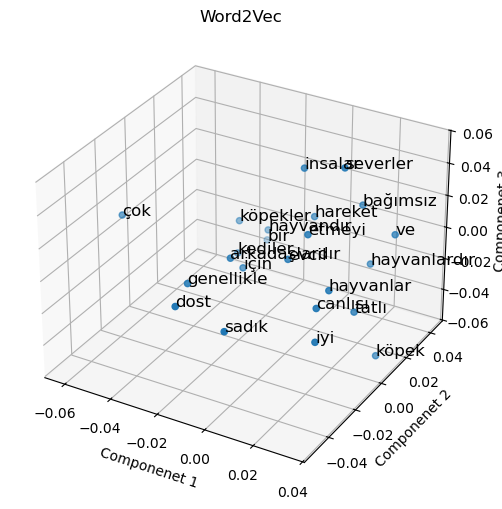

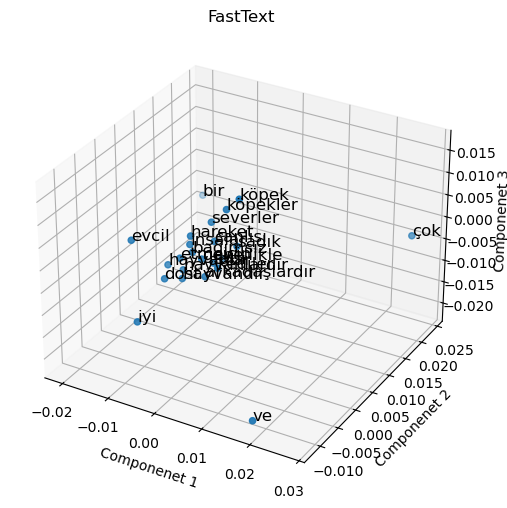

In [35]:
plot_word_embedding(word2_vec_model, "Word2Vec")
plot_word_embedding(fast_text_model, "FastText")

### IMDB veriseti ile Word Embeddings

In [36]:
df = pd.read_csv('IMDB Dataset.csv')
documents = df["review"]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [37]:
# veri temizleme
def clean_text(text):
    text = text.lower() # küçük harf
    text = re.sub(r"\d+","",text) # sayıları temizle
    text = re.sub(r"[^\w\s]","",text) # özel karakterleri temizle
    words = [word for word in text.split() if len(word) > 2]
    words = [word for word in words if word not in stop_words]
    text = " ".join(words)
    
    #text = simple_preprocess(text)

    return text

In [38]:
cleaned_documents = []
for doc in documents:
    cleaned_documents.append(clean_text(doc))

In [39]:
# metin tokenizasyonu
tokenized_documents = [simple_preprocess(doc) for doc in cleaned_documents]

In [40]:
# word2vec modeli tanımlama
word2_vec_model = Word2Vec(sentences=tokenized_documents, vector_size=50, window=5, min_count=1, sg=0)
word_vectors = word2_vec_model.wv

words = list(word_vectors.index_to_key)[:500]
vectors = [word_vectors[word] for word in words]

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [41]:
# KMeans clustering K=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(vectors)
clusters = kmeans.labels_

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [42]:
# PCA 50 -> 2
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

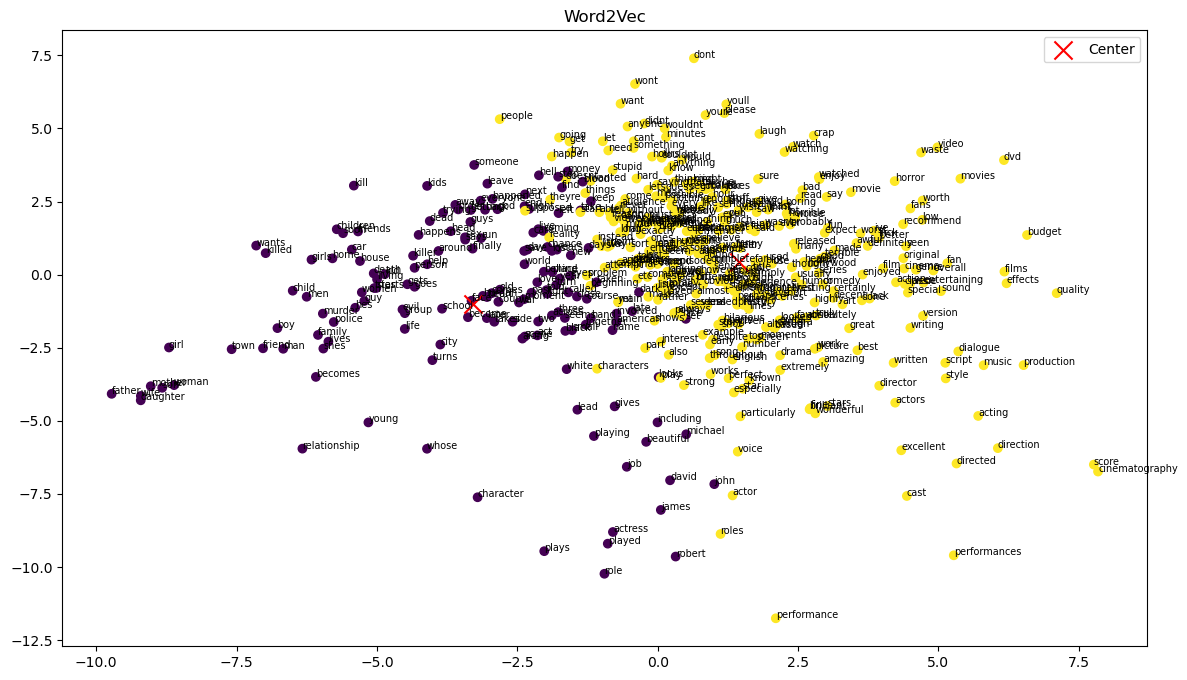

In [43]:
# 2D görselleştirme
plt.figure(figsize=(14,8))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c=clusters, cmap="viridis")

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="red", marker="x", s=170, label="Center")
plt.legend()

for i, word in enumerate(words):
    plt.text(reduced_vectors[i,0], reduced_vectors[i,1], word, fontsize=7)

plt.title("Word2Vec")
plt.show()

## Transformers

In [44]:
#!pip install transformers
#!pip install torch torchvision torchaudio
from transformers import AutoTokenizer, AutoModel

In [45]:
# model ve tokenizer yükle
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [46]:
# metni tanımla
text = "Transformers can be used for naturel language processing."

# metni tokenlara çevir
inputs = tokenizer(text, return_tensors="pt") # çıktı pytorch tensörü olarak return edilir.

In [47]:
import torch
# modeli kullanarak metin temsili oluştur
with torch.no_grad(): # gradyanların hesaplanması durdurulur, belleği daha verimli kullanırız.
    outputs = model(**inputs)

In [48]:
last_hidden_state = outputs.last_hidden_state # tüm token çıktılarını almak için

first_token_embedding = last_hidden_state[0,0,:].numpy()
print(f"Örnek Metin Temsili:\n{first_token_embedding[0:5]}")

Örnek Metin Temsili:
[-0.50845546 -0.35538378 -0.11001587 -0.08058283 -0.67484146]
